# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from scipy.stats import linregress

# Import the OpenWeatherMap API key]
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

/Users/yenori/anaconda3/envs/mydev/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/cz/_pyz_5qn69155q4_bc51whp00000gn/T/ipykernel_64987/2393294300.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat


Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | mashhad
Processing Record 4 of Set 1 | vallenar
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | jahazpur
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | wangkui
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | suva
Processing Record 18 of Set 1 | essaouira
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | thinadhoo
Processing Record 22 of Set 1 | masterton
Processing Record 23 of Set 1 | viedma
Processing Record 24 of Set 1 | grytviken
Processing Record 25 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,-18.95,76,82,3.43,GL,1708711037
1,adamstown,-25.0660,-130.1015,26.26,79,68,5.27,PN,1708710773
2,mashhad,36.2970,59.6062,7.08,57,40,3.09,IR,1708711038
3,vallenar,-28.5708,-70.7581,27.55,31,0,6.01,CL,1708711038
4,port-aux-francais,-49.3500,70.2167,8.74,94,100,12.90,TF,1708710802


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-18.95,76,82,3.43,GL,1708711037
1,adamstown,-25.0660,-130.1015,26.26,79,68,5.27,PN,1708710773
2,mashhad,36.2970,59.6062,7.08,57,40,3.09,IR,1708711038
3,vallenar,-28.5708,-70.7581,27.55,31,0,6.01,CL,1708711038
4,port-aux-francais,-49.3500,70.2167,8.74,94,100,12.90,TF,1708710802


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

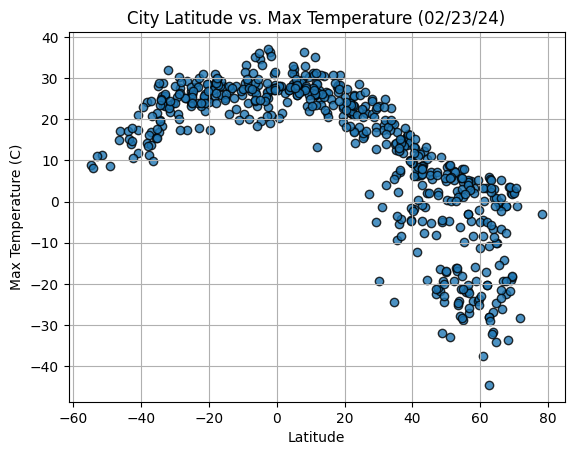

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], 
            city_data_df['Max Temp'], 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

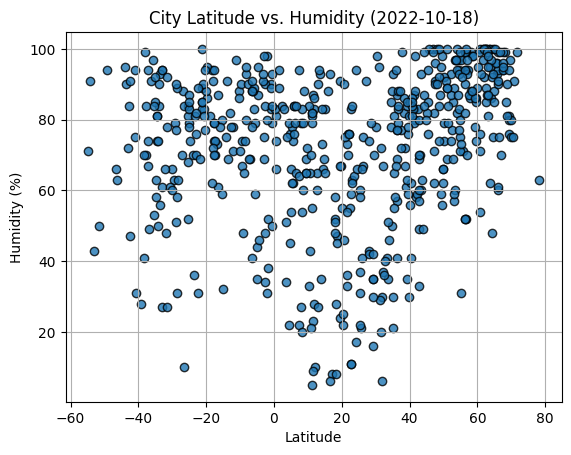

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], 
            city_data_df['Humidity'], 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8)
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

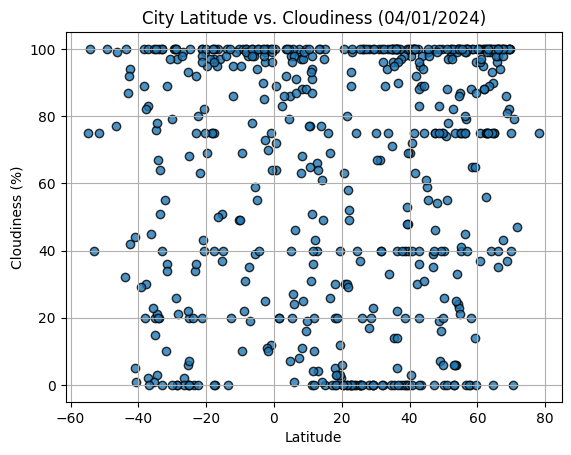

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], 
            city_data_df['Cloudiness'], 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (04/01/2024)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

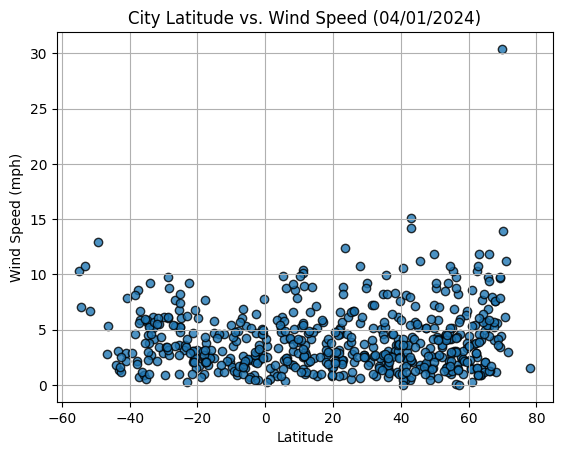

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], 
            city_data_df['Wind Speed'], 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (04/01/2024)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression values
    regress_values = x_values * slope + intercept

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Annotate the plot with the line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Label the plot
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)

    # Print the r-value
    print(f"The r-value is: {r_value**2}")

    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-18.95,76,82,3.43,GL,1708711037
2,mashhad,36.2970,59.6062,7.08,57,40,3.09,IR,1708711038
5,iqaluit,63.7506,-68.5145,-26.84,62,100,1.54,CA,1708711038
6,jahazpur,25.6167,75.2833,16.06,21,0,2.82,IN,1708711038
7,keflavik,64.0049,-22.5624,2.95,86,40,7.72,IS,1708711039


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,26.26,79,68,5.27,PN,1708710773
3,vallenar,-28.5708,-70.7581,27.55,31,0,6.01,CL,1708711038
4,port-aux-francais,-49.3500,70.2167,8.74,94,100,12.90,TF,1708710802
9,edinburgh of the seven seas,-37.0676,-12.3116,16.80,74,83,5.89,SH,1708711039
10,lebu,-37.6167,-73.6500,16.23,70,30,8.63,CL,1708711039


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6626957470469786


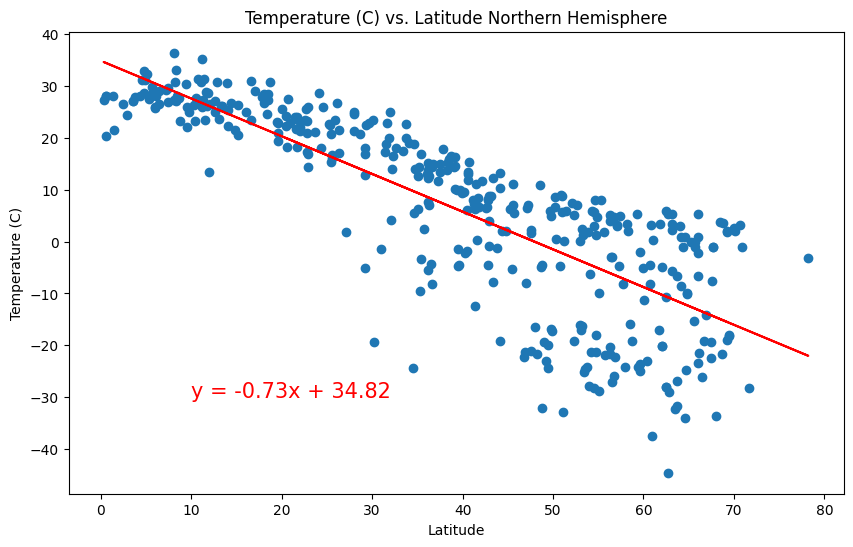

In [15]:
# Call the function for the Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Temperature (C)', 'Temperature (C) vs. Latitude Northern Hemisphere', 
                       (10, -30))


The r-value is: 0.41830264813429335


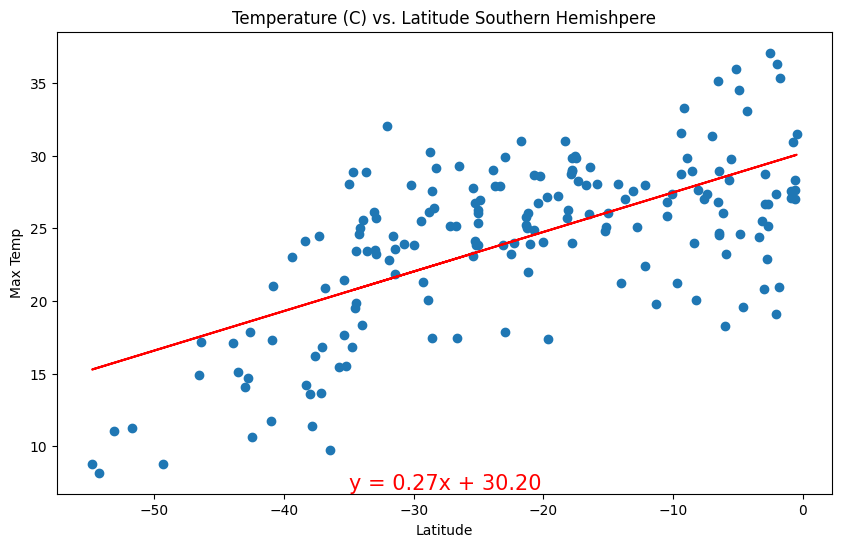

In [16]:
# Call the function for the Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       'Max Temp', 
                       'Temperature (C) vs. Latitude Southern Hemishpere', 
                       (-35, 7))

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the scatter plot shows a  negative linear relationship between latitude and temperature. This indicates that as one moves away from the equator, North, the temperature tends to decrease. 

Conversely, in the Southern Hemisphere, the scatter plot shows a positive linear relationship between latitude and temperature. As one moves closer to the equator from the South, the temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2082100779596722


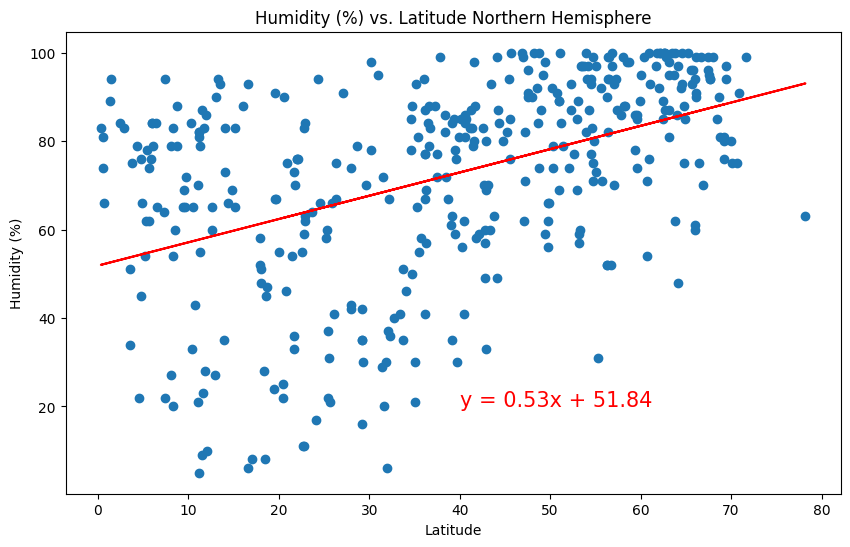

In [17]:
# Call the function for the Northern Hemisphere for Humidity vs. Latitude
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Humidity (%)', 
                       'Humidity (%) vs. Latitude Northern Hemisphere', 
                       (40, 20))

The r-value is: 0.00656356435272075


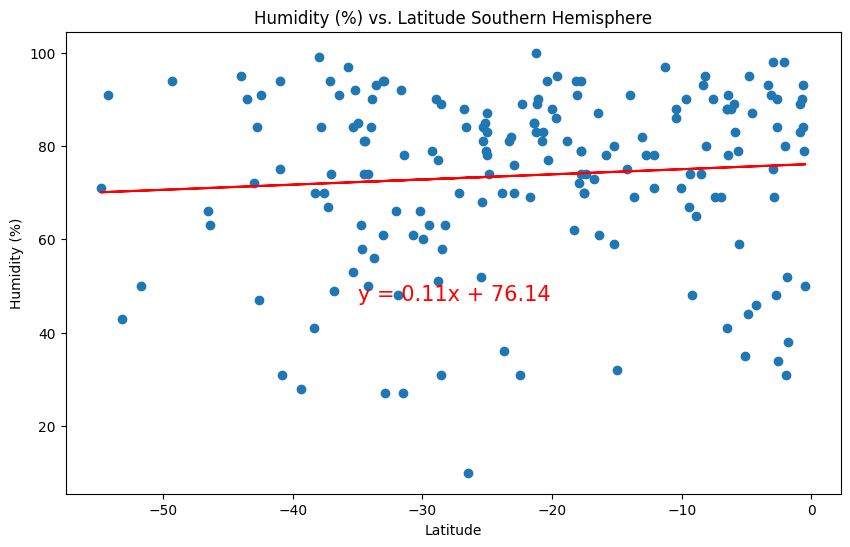

In [18]:
# Call the function for the Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Humidity (%)', 
                       'Humidity (%) vs. Latitude Southern Hemisphere', 
                       (-35, 47))

**Discussion about the linear relationship:** 

The linear regression for the Northern Hemisphere indicates a  positive correlation between humidity and latitude, suggesting that as one moves away from the equator, the humidity tends to increase slightly.

In contrast, the Southern Hemisphere also shows a positive correlation between humidity and latitude, which suggests that in the Southern Hemisphere, humidity increases more noticeably as one moves towards the equator. 

However, in both hemispheres, the spread of data points suggests that factors other than latitude also significantly influence humidity levels.



### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0518732602333971


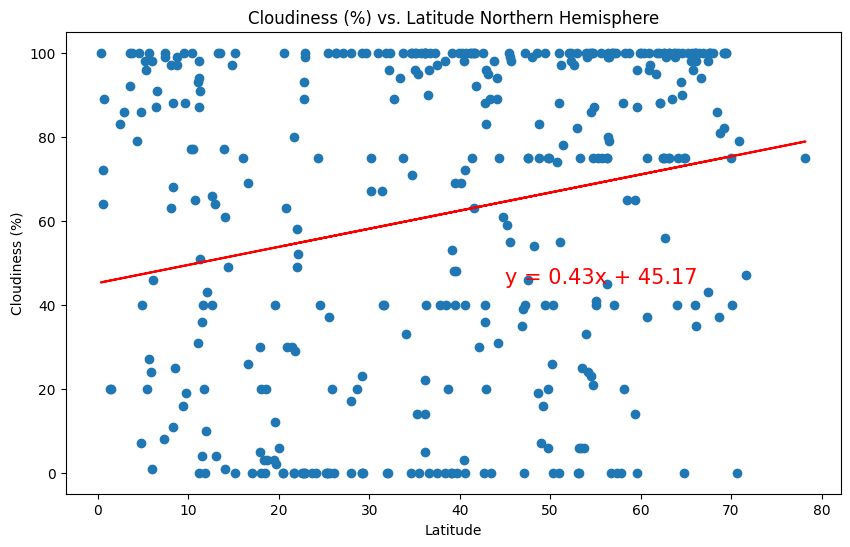

In [19]:
# Call the function for the Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Cloudiness (%)', 
                       'Cloudiness (%) vs. Latitude Northern Hemisphere', 
                       (45, 45))

The r-value is: 0.039504488892533364


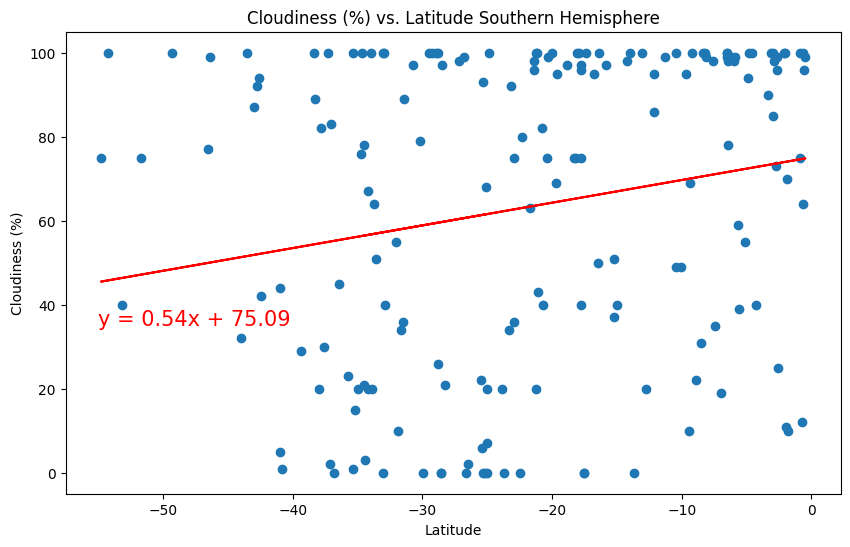

In [20]:
# Call the function for the Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Cloudiness (%)', 
                       'Cloudiness (%) vs. Latitude Southern Hemisphere', 
                       (-55, 35))

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the regression plot shows a positive correlation between cloudiness and latitude, indicating that cloudiness slightly increases as one moves northward from the equator.

For the Southern Hemisphere, the positive trend is similar, indicating a slight increase in cloudiness as one moves towards the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016870713457281153


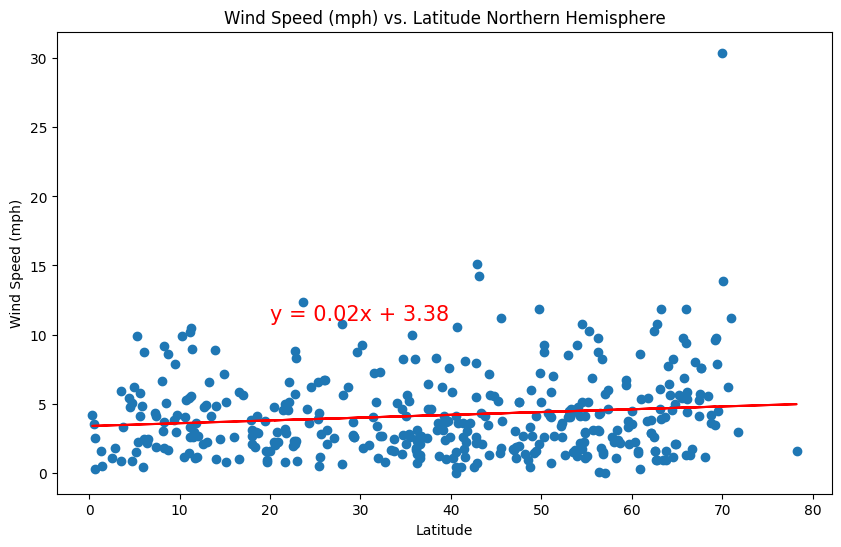

In [21]:
# Call the function for the Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Wind Speed (mph)', 
                       'Wind Speed (mph) vs. Latitude Northern Hemisphere', 
                       (20, 11))

The r-value is: 0.09800245332393205


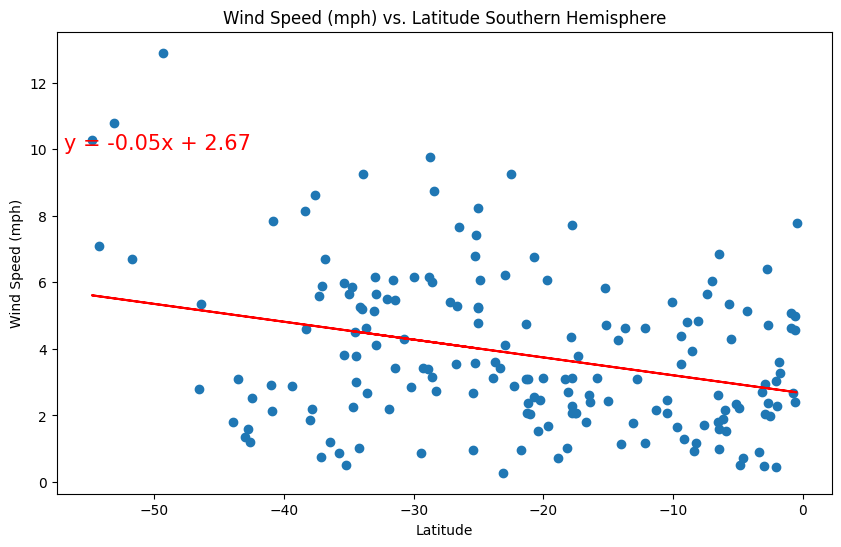

In [22]:
# Call the function for the Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Wind Speed (mph)', 
                       'Wind Speed (mph) vs. Latitude Southern Hemisphere', 
                       (-57, 10))

**Discussion about the linear relationship:** 

The Northern Hemisphere shows a very slight negative correlation between wind speed and latitude.

Similarly, the Southern Hemisphere exhibits a slightly steeper negative slope in its regression line. 

This trend suggests a subtle relationship between wind speed and latitude, but again, it is likely that other factors play a more dominant role in affecting wind speeds in this hemisphere.